# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [85]:
# import libraries here
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [86]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [87]:
# your answer here-1st way
employee.pivot_table(index = 'Department', values = 'Salary')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [88]:
# your answer here-2nd way
employee.groupby(['Department'])['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [89]:
# your answer here
employee.pivot_table(index = ['Department','Title'], values = 'Salary')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [90]:
# your answer here
employee.pivot_table(index = 'Title', columns = 'Years', values = 'Salary', fill_value = 0)

Years,1,2,3,4,7,8
Title,,,,,,
VP,0,0,0,0,0,70
analyst,35,30,0,35,0,0
associate,0,55,55,0,60,0


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [91]:
# your answer here
employee.pivot_table(index = ['Department','Title'], values = ['Name','Salary'], aggfunc = {'Name': len,'Salary':np.median})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

In [92]:
employee.groupby(['Department','Title'])[['Name','Salary']].agg([len,np.mean])

Salary      
                        len  mean
Department Title                 
HR         VP             1  70.0
           analyst        2  32.5
IT         VP             1  70.0
           analyst        2  32.5
           associate      1  60.0
Sales      associate      2  55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [126]:
# your answer here
employee.pivot_table(index = ['Department','Title'], aggfunc= {'Salary':[np.mean, np.median, min, max, np.std]}, values = 'Salary')

max  mean  median   min       std
Department Title                                        
HR         VP         70.0  70.0    70.0  70.0       NaN
           analyst    35.0  32.5    32.5  30.0  3.535534
IT         VP         70.0  70.0    70.0  70.0       NaN
           analyst    35.0  32.5    32.5  30.0  3.535534
           associate  60.0  60.0    60.0  60.0       NaN
Sales      associate  55.0  55.0    55.0  55.0  0.000000

In [94]:
"""For groupings where the count is larger than 1, aggregations differ from one another. 
In any case, there is barely any deviation among our dataset."""

'For groupings where the count is larger than 1, aggregations differ from one another. \nIn any case, there is barely any deviation among our dataset.'

#### Based on your comments, fill the missing values with an appropriate value

In [125]:
pd.pivot_table(employee, index = ['Department', 'Title'], values= 'Salary', aggfunc= {'Salary':[np.mean, np.median, min, max, np.std]}, fill_value=0)

max  mean  median  min       std
Department Title                                      
HR         VP          70  70.0    70.0   70  0.000000
           analyst     35  32.5    32.5   30  3.535534
IT         VP          70  70.0    70.0   70  0.000000
           analyst     35  32.5    32.5   30  3.535534
           associate   60  60.0    60.0   60  0.000000
Sales      associate   55  55.0    55.0   55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [56]:
# your answer here
employee.pivot_table(index = 'Department', values = ['Name','Salary'], aggfunc = {'Name': len,'Salary': sum})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [58]:
# your answer here
employee.pivot_table(index = ['Department','Title'],values=['Years','Salary'], aggfunc = {'Years':sum,'Salary':np.mean})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
        

In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [59]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [60]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [16]:
# your answer here

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [63]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

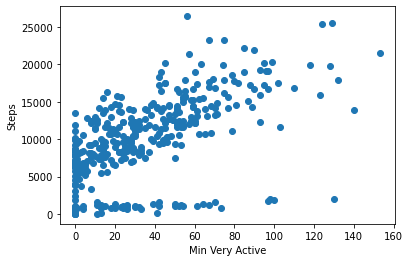

In [66]:
# your answer here
plt.scatter(fitbit['Minutes Very Active'],fitbit['Steps'])
plt.xlabel('Min Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here
"""There seems to be a positive correlation that we can confirm (0.57). 
There are still a number of very active people who do not take any steps."""

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [71]:
# your answer here
# your answer here
fitbit_clean = fitbit[fitbit['Minutes Sedentary'] > 10] # removing cases where Minutes Sedentary is lower than 10 minutes as we suspect null or 1 min values are biasing the whole distribution.

fitbit_clean['Minutes Sedentary'].corr(fitbit_clean['Steps'])


-0.3782654163999832

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

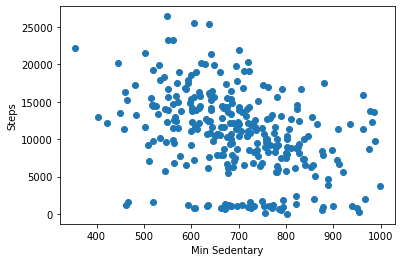

In [72]:
# your answer here
plt.scatter(fitbit_clean['Minutes Sedentary'],fitbit_clean['Steps'])
plt.xlabel('Min Sedentary')
plt.ylabel('Steps')
plt.show()

In [73]:
# Your comment here
"""There is a negative correlation. Not very strong as the distribution is rather heteroskedastic, but we can see a pattern."""

'There is a negative correlation. Not very strong as the distribution is rather heteroskedastic, but we can see a pattern.'

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [76]:
# your answer here
fitbit2_clean = fitbit[fitbit['MinutesOfSleep'] > 10] # removing cases where Minutes Sedentary is lower than 10 minutes as we suspect null or 1 min values are biasing the whole distribution.

fitbit2_clean['MinutesOfSleep'].corr(fitbit2_clean['Steps'])

0.048928258329569374

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

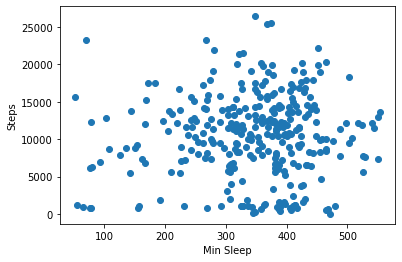

In [78]:
# your answer here
plt.scatter(fitbit2_clean['MinutesOfSleep'],fitbit2_clean['Steps'])
plt.xlabel('Min Sleep')
plt.ylabel('Steps')
plt.show()

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [106]:
# your answer here

cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()

In [108]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [119]:
# your answer here
cor_fit.sort_values('Steps',ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [120]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [121]:
#Print time_grades
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12699c340>,
      dtype=object)

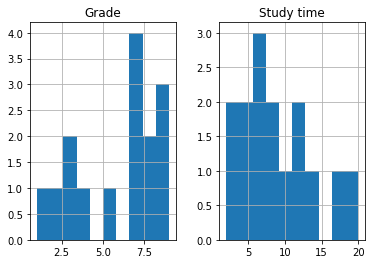

In [122]:
# your answer here
time_grades.hist()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [123]:
# your answer here-Pearson 
time_grades['Study time'].corr(time_grades['Grade'])

0.7980456073578858

In [124]:
## your answer here-Spearman
time_grades['Study time'].corr(time_grades['Grade'],method = 'spearman')

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

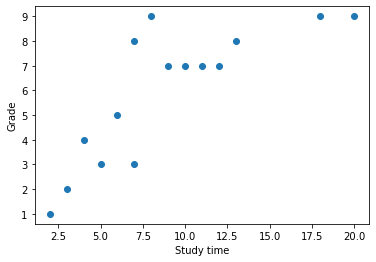

In [127]:
# your answer here
plt.scatter(time_grades['Study time'],time_grades['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

In [128]:
#your comment here
"""Indeed there is a positive correlation as both variables increase together. The relation appears to have decreasing marginal returns though."""

'Indeed there is a positive correlation as both variables increase together. The relation appears to have decreasing marginal returns though.'

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [130]:
#your comment here
"""The Spearman correlation correlates the rank of a variable, while the Pearson correlation correlates the variable itself. As a result of that, if distances between variables are dispersed but ranks are (inversely or not) kept, Spearman correlation will show higher than Pearson's."""

"The Spearman correlation correlates the rank of a variable, while the Pearson correlation correlates the variable itself. As a result of that, if distances between variables are dispersed but ranks are (inversely or not) kept, Spearman correlation will show higher than Pearson's."